In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib import rc



In [86]:
def set_style(scale=1):
    sns.set_context("paper")

    sns.set(font='sans', font_scale=scale)

    sns.set_style("ticks", {
        "font.family": "serif",
        "font.serif": ["Helvetica", "sans-serif"]
    })
    
rc('font', **{'family': 'serif', 'serif': ['Helvetica']})

Visualize exc

In [75]:
data = np.load('exc.npy')

tuples = [
    ("NN_PBE", "0"), 
    ("NN_PBE", "1"), 
    ("NN_PBE", "100"),
    ("NN_PBE", "inf"),
    ("NN_XALPHA", "0"), 
    ("NN_XALPHA", "1"), 
    ("NN_XALPHA", "100"),
    ("NN_XALPHA", "inf"),
    ('PBE', "0"),
    ]

cols = pd.MultiIndex.from_tuples(tuples)
indices = pd.Index(np.linspace(0, 5, 5000), name='s')
s = np.linspace(0, 5, 5000)

df = pd.DataFrame(data.T, columns=cols, index=indices)

names = {
    "NN_PBE": "NN_PBE",
    "NN_XALPHA": 'NN-Xα',
    'PBE':'PBE'
}
styles = {
    '0': 'solid',
    '1':'dashed',
    '100':'dotted',
    'inf': 'dashdot',
}
colors = {
    "NN_PBE": "red",
    "NN_XALPHA": 'green',
    'PBE':'black'
}

df

NN_PBE                               NN_XALPHA            \
                 0         1       100       inf         0         1   
s                                                                      
0.000000  1.142003  1.117846  1.115977  1.108342  1.076093  1.657869   
0.001000  1.142183  1.119229  1.116983  1.109137  1.063288  1.534183   
0.002000  1.141745  1.120116  1.117573  1.109680  1.065624  1.449772   
0.003001  1.141396  1.120669  1.117938  1.110032  1.067508  1.394703   
0.004001  1.141108  1.121063  1.118203  1.110309  1.068269  1.355730   
...            ...       ...       ...       ...       ...       ...   
4.995999  1.998919  1.999062  1.998098  1.964108  1.073752  1.073604   
4.996999  1.998997  1.999140  1.998174  1.964178  1.073751  1.073603   
4.998000  1.999075  1.999218  1.998250  1.964248  1.073750  1.073602   
4.999000  1.999152  1.999295  1.998325  1.964317  1.073750  1.073602   
5.000000  1.999230  1.999373  1.998401  1.964387  1.073749  1.073601   

                                   PBE  
               100       inf         0  
s                                       
0.000000  1.731351  2.105036  1.130463  
0.001000  1.626062  1.999591  1.130463  
0.002000  1.551589  1.931141  1.130463  
0.003001  1.504414  1.887891  1.130463  
0.004001  1.469871  1.856449  1.130463  
...            ...       ...       ...  
4.995999  1.067850  1.249858  1.701400  
4.996999  1.067851  1.249846  1.701436  
4.998000  1.067851  1.249834  1.701471  
4.999000  1.067852  1.249823  1.701507  
5.000000  1.067852  1.249811  1.701543  

[5000 rows x 9 columns]

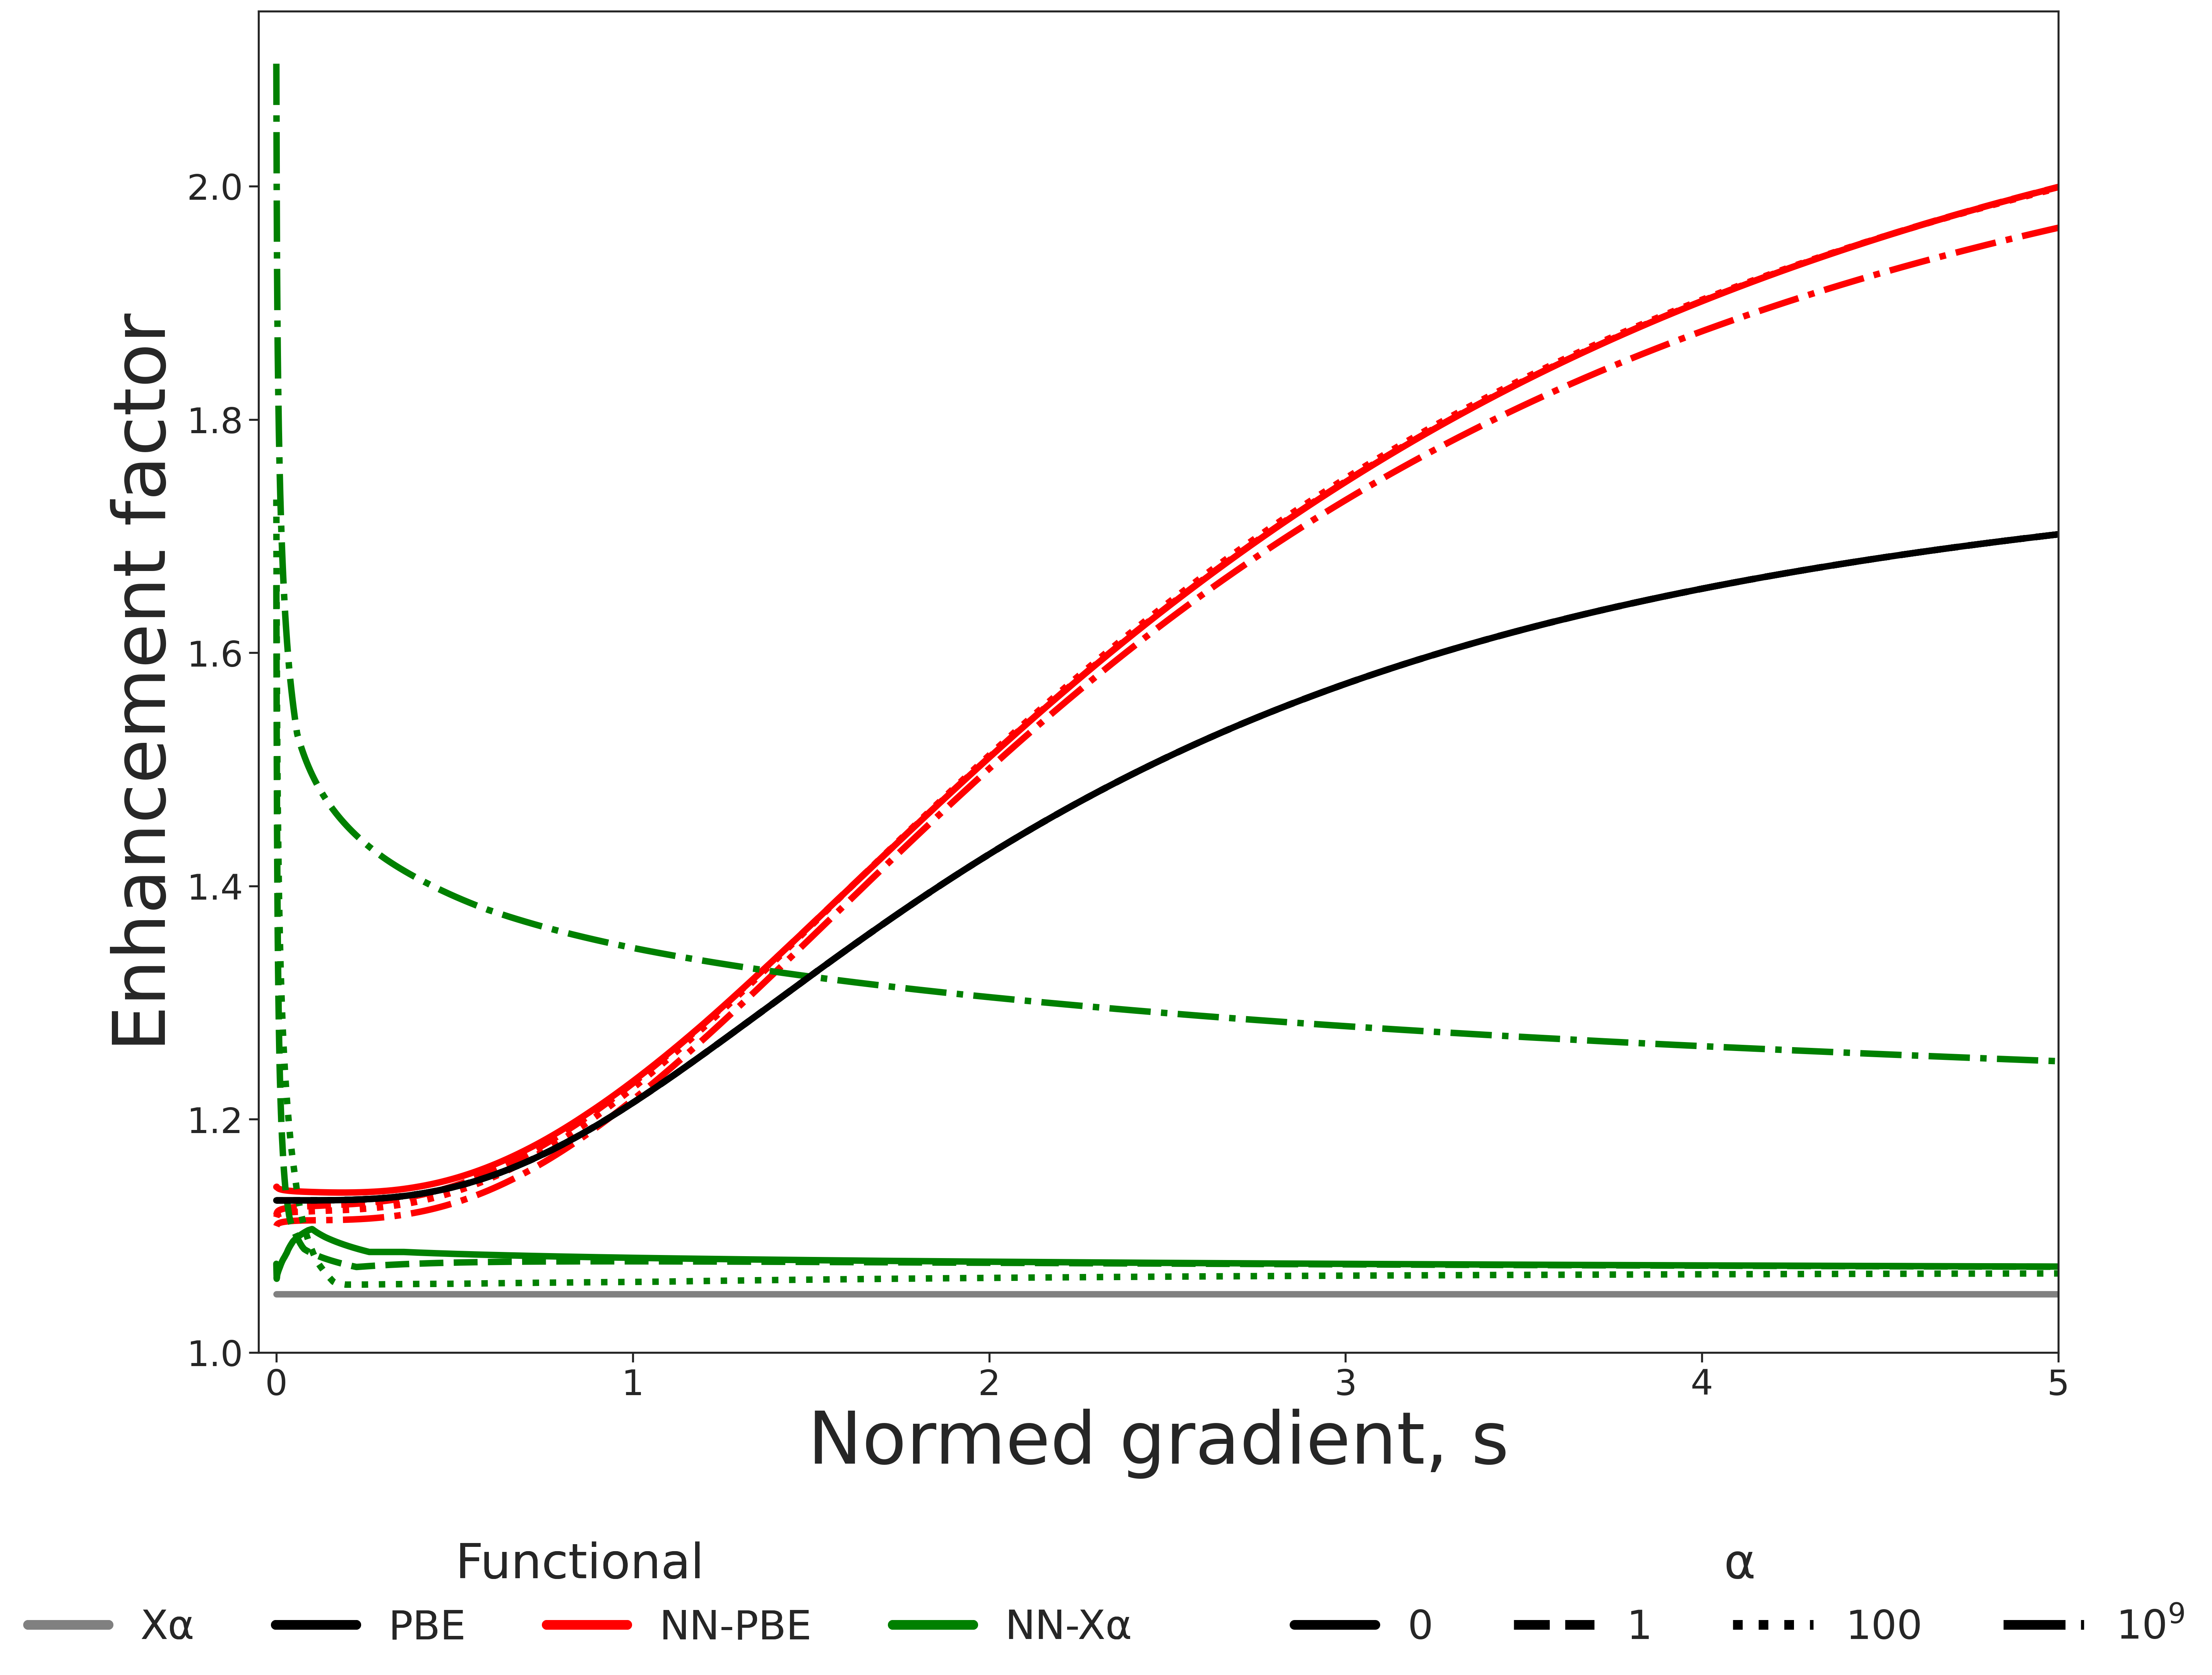

In [77]:
set_style(scale=2)
df['NN_PBE'].loc[:, '0']
fig = plt.figure(figsize=[20,15], dpi=300)
plt.xlim(-0.05,5)
plt.ylim(1,2.15)
lw = 4

for functional in names:
    for alpha in ['0', '1', '100', 'inf']:
        try:
            series = df[functional].loc[:, alpha]
        except:
            pass

        linestyle = styles[alpha]
        color = colors[functional]
        plt.plot(np.linspace(0, 5, 5000), series, label=functional, linestyle=linestyle, color=color, lw=lw)
plt.ylabel('Enhancement factor', size=45)
plt.xlabel('Normed gradient, s', size=45)


plt.plot([0,5], [1.05,1.05], color='grey', lw=4, alpha=1)

one = Line2D([0], [0], color='black', lw=lw*1.5, label='0')
two = Line2D([0], [0], color='black', lw=lw*1.5, label='1', linestyle='dashed')
three = Line2D([0], [0], color='black', lw=lw*1.5, label='100', linestyle='dotted')
four = Line2D([0], [0], color='black', lw=lw*1.5, label='$10^9$', linestyle='dashdot')
xalpha = Line2D([0], [0], color='grey', lw=lw*1.5, label='Xα')

legend1 = plt.legend(handles=[one, two, three, four], loc = 'lower right', fontsize = 25, fancybox = False, title="α", title_fontsize=30, bbox_to_anchor=(0.97, -0.08), bbox_transform=fig.transFigure, ncol=4, frameon=False)

black = Line2D([0], [0], color='black', lw=lw*1.5, label='PBE')
red = Line2D([0], [0], color='red', lw=lw*1.5, label='NN-PBE')
green = Line2D([0], [0], color='green', lw=lw*1.5, label='NN-Xα')

legend2 = plt.legend(handles=[xalpha, black, red, green], loc = 'lower left', fontsize = 25, fancybox = False, title="Functional", title_fontsize=30, bbox_to_anchor=(0.01, -0.08), bbox_transform=fig.transFigure, ncol=4, frameon=False)


fig.add_artist(legend1)
fig.add_artist(legend2)
plt.show()

Visuzalize Ar2

In [78]:
df = pd.read_csv('Ar2.csv', index_col=0)
df

,PBE,NN_PBE,NN_XALPHA,x
0,1.584822,1.642239,1.197688,-7.00000
1,1.584759,1.642162,1.197633,-6.99972
2,1.584695,1.642085,1.197578,-6.99944
3,1.584631,1.642008,1.197523,-6.99916
4,1.584567,1.641931,1.197469,-6.99888
...,...,...,...,...
49995,1.584567,1.641931,1.197469,6.99888
49996,1.584631,1.642008,1.197523,6.99916
49997,1.584695,1.642085,1.197578,6.99944
49998,1.584759,1.642162,1.197633,6.99972


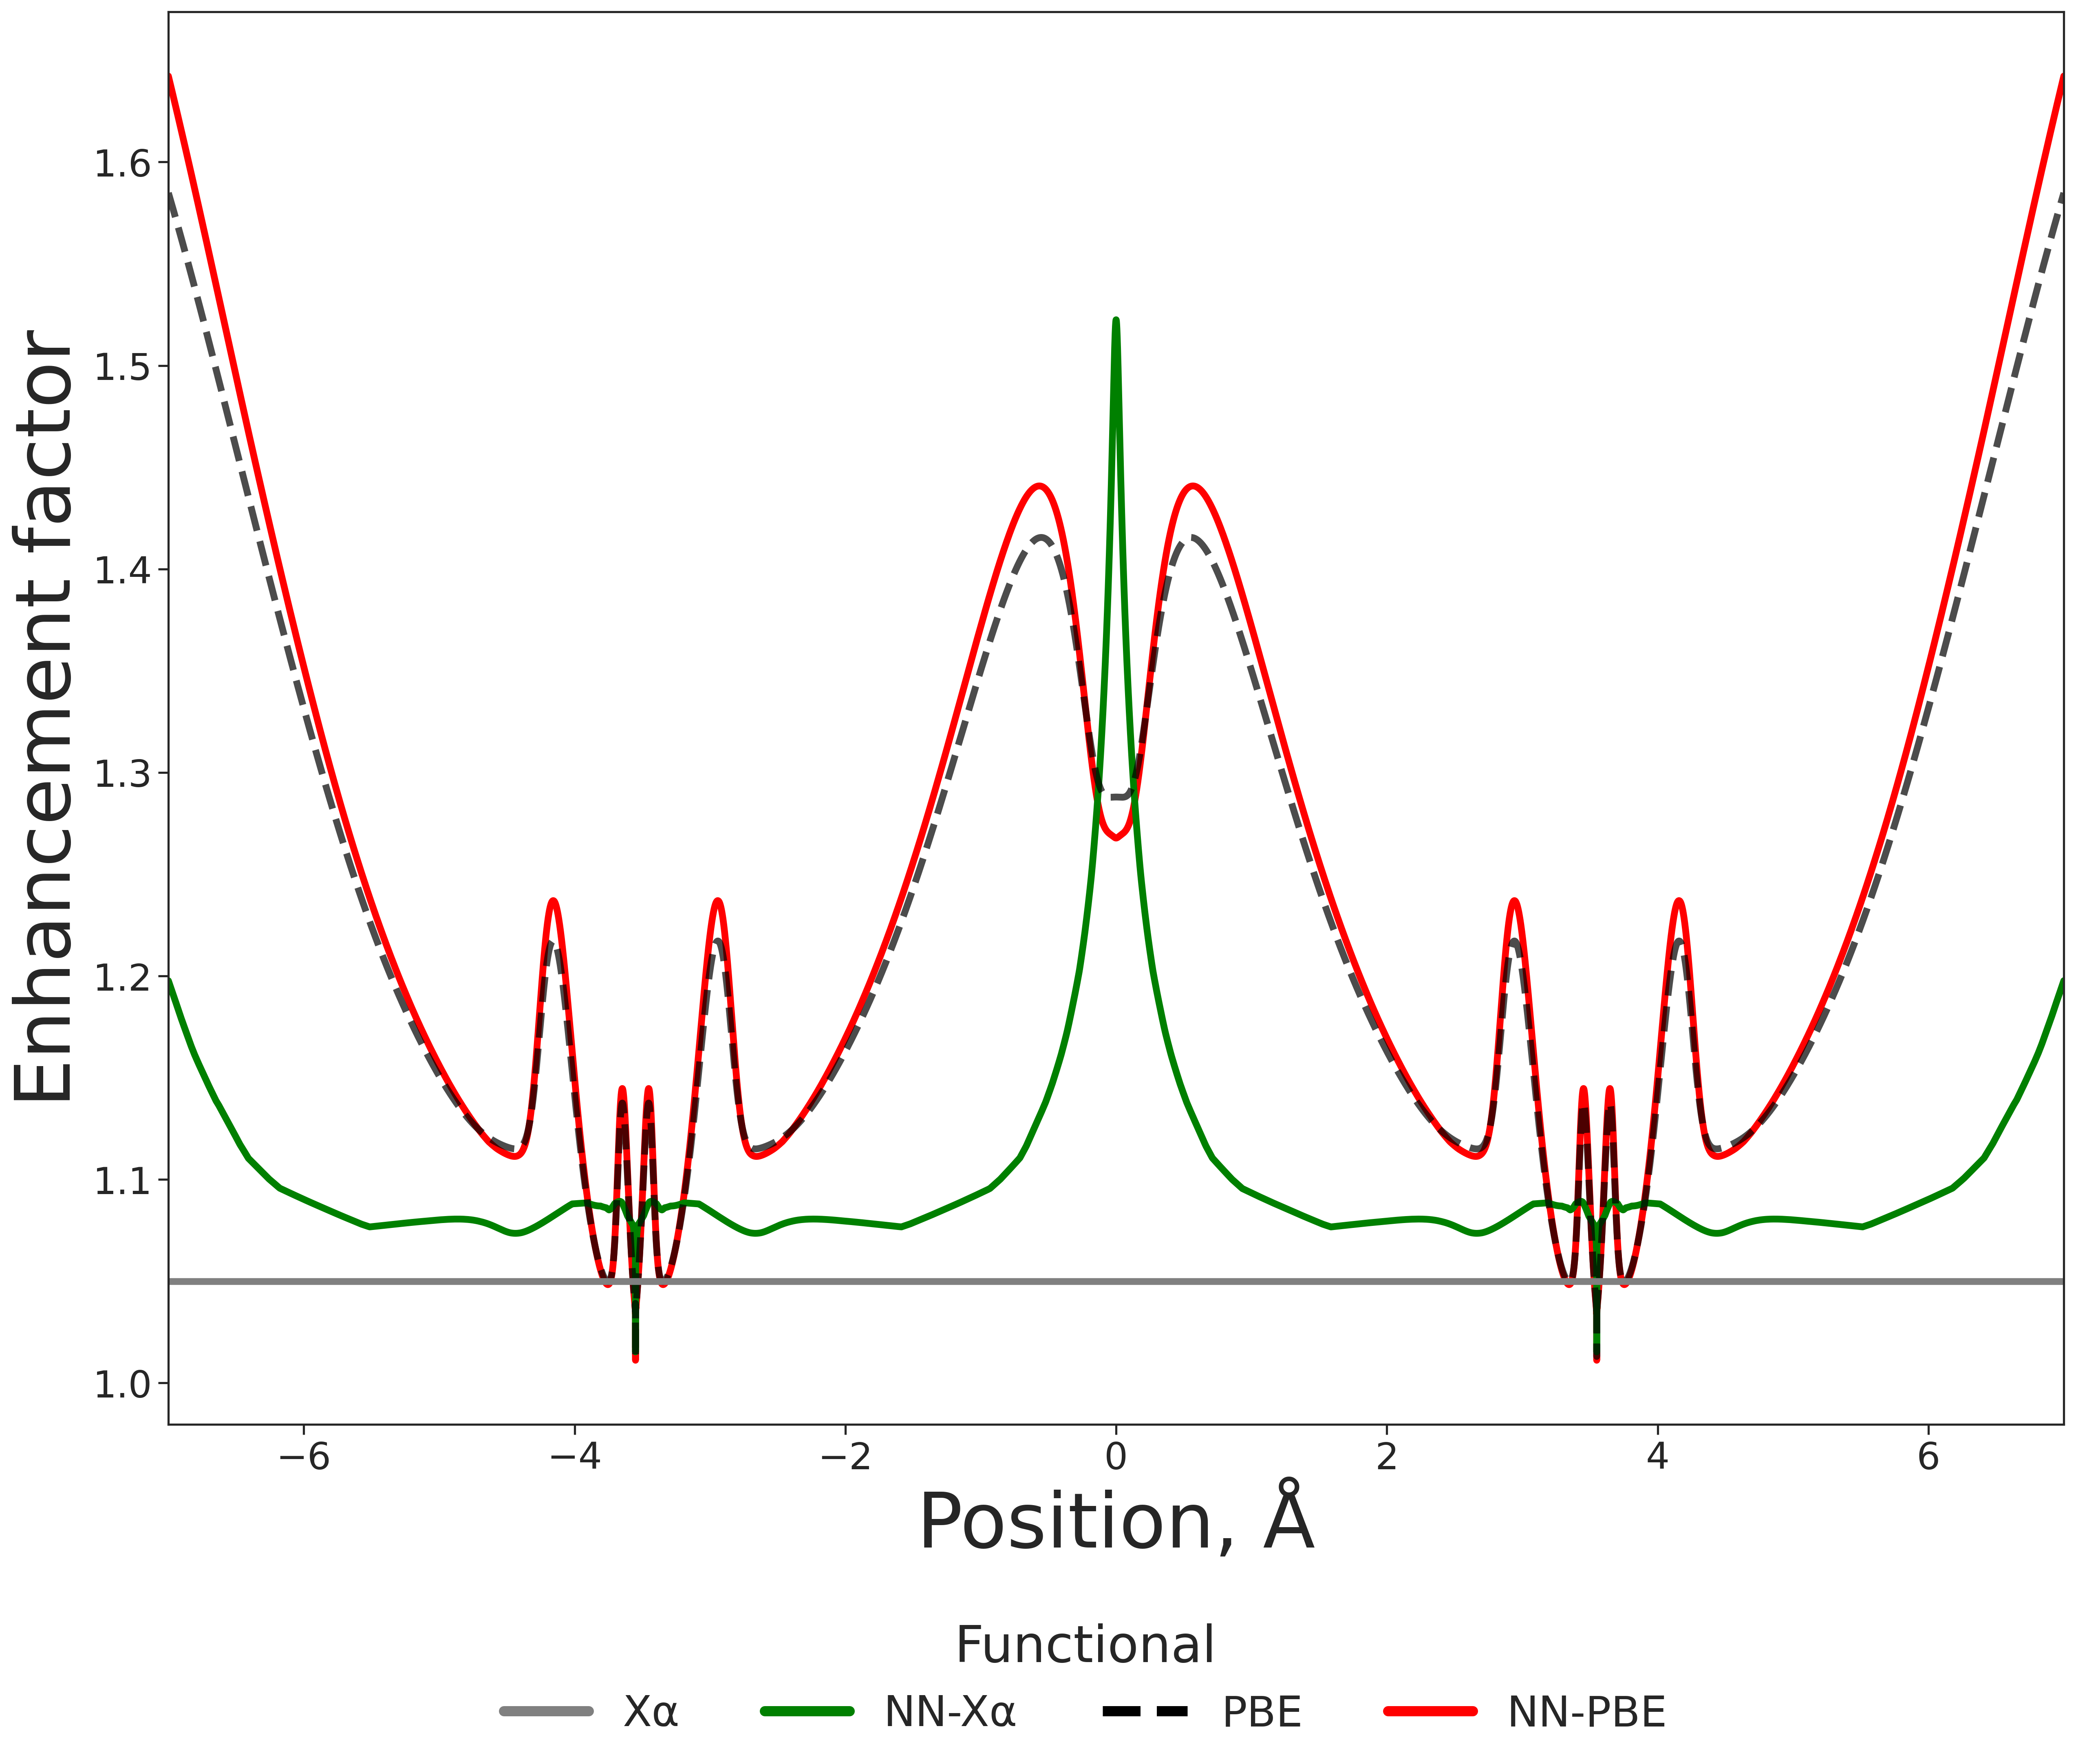

In [80]:
set_style(scale=2)
fig = plt.figure(figsize=[20,15], dpi=300)
x = df['x']
plt.xlim(-7,7)
plt.ylabel('Enhancement factor', size=45)
plt.xlabel('Position, Å', size=45)
for functional in names:
    Fxc = df[functional]
    
    color = colors[functional]
    if functional=='PBE':
        plt.plot(x, Fxc, '--', color=color, lw=4, alpha=0.7)
    else:
        plt.plot(x, Fxc, color=color, lw=4)

plt.plot([-7,7], [1.05,1.05], color='grey', lw=4, alpha=1)
xalpha = Line2D([0], [0], color='grey', lw=lw*1.5, label='Xα')
dashed_pbe = Line2D([0], [0], color='black', lw=lw*1.5, label='PBE', linestyle='dashed')
legend = plt.legend(handles=[xalpha, green, dashed_pbe, red], loc = 'lower center', fontsize = 25, fancybox = False, title="Functional", title_fontsize=30, bbox_to_anchor=(0.5, -0.08), bbox_transform=fig.transFigure, ncol=4, frameon=False)
plt.show()

Diet Comparison

In [81]:
df = pd.read_csv('DietGMTKN55_results.csv')
df

,System,PBE-D3BJ Error,NN_PBE Error,XAlpha Error,NN_XAlpha Error,Database
0,Amino20x4-13,0.61,0.09,1.97,2.94,Amino20x4
1,Amino20x4-35,0.63,0.05,3.20,2.48,Amino20x4
2,Amino20x4-76,0.11,0.08,0.52,0.80,Amino20x4
3,BHROT27-24,0.50,0.14,1.67,1.86,BHROT27
4,FH51-15,4.40,1.45,9.44,12.13,FH51
5,FH51-40,1.19,3.39,4.99,5.54,FH51
6,TAUT15-10,1.46,1.61,0.47,0.65,TAUT15
7,ALK8-4,1.00,0.10,0.55,NaN,ALK8
8,DARC-3,1.57,6.41,6.77,10.33,DARC
9,DARC-4,1.57,2.95,9.33,12.31,DARC


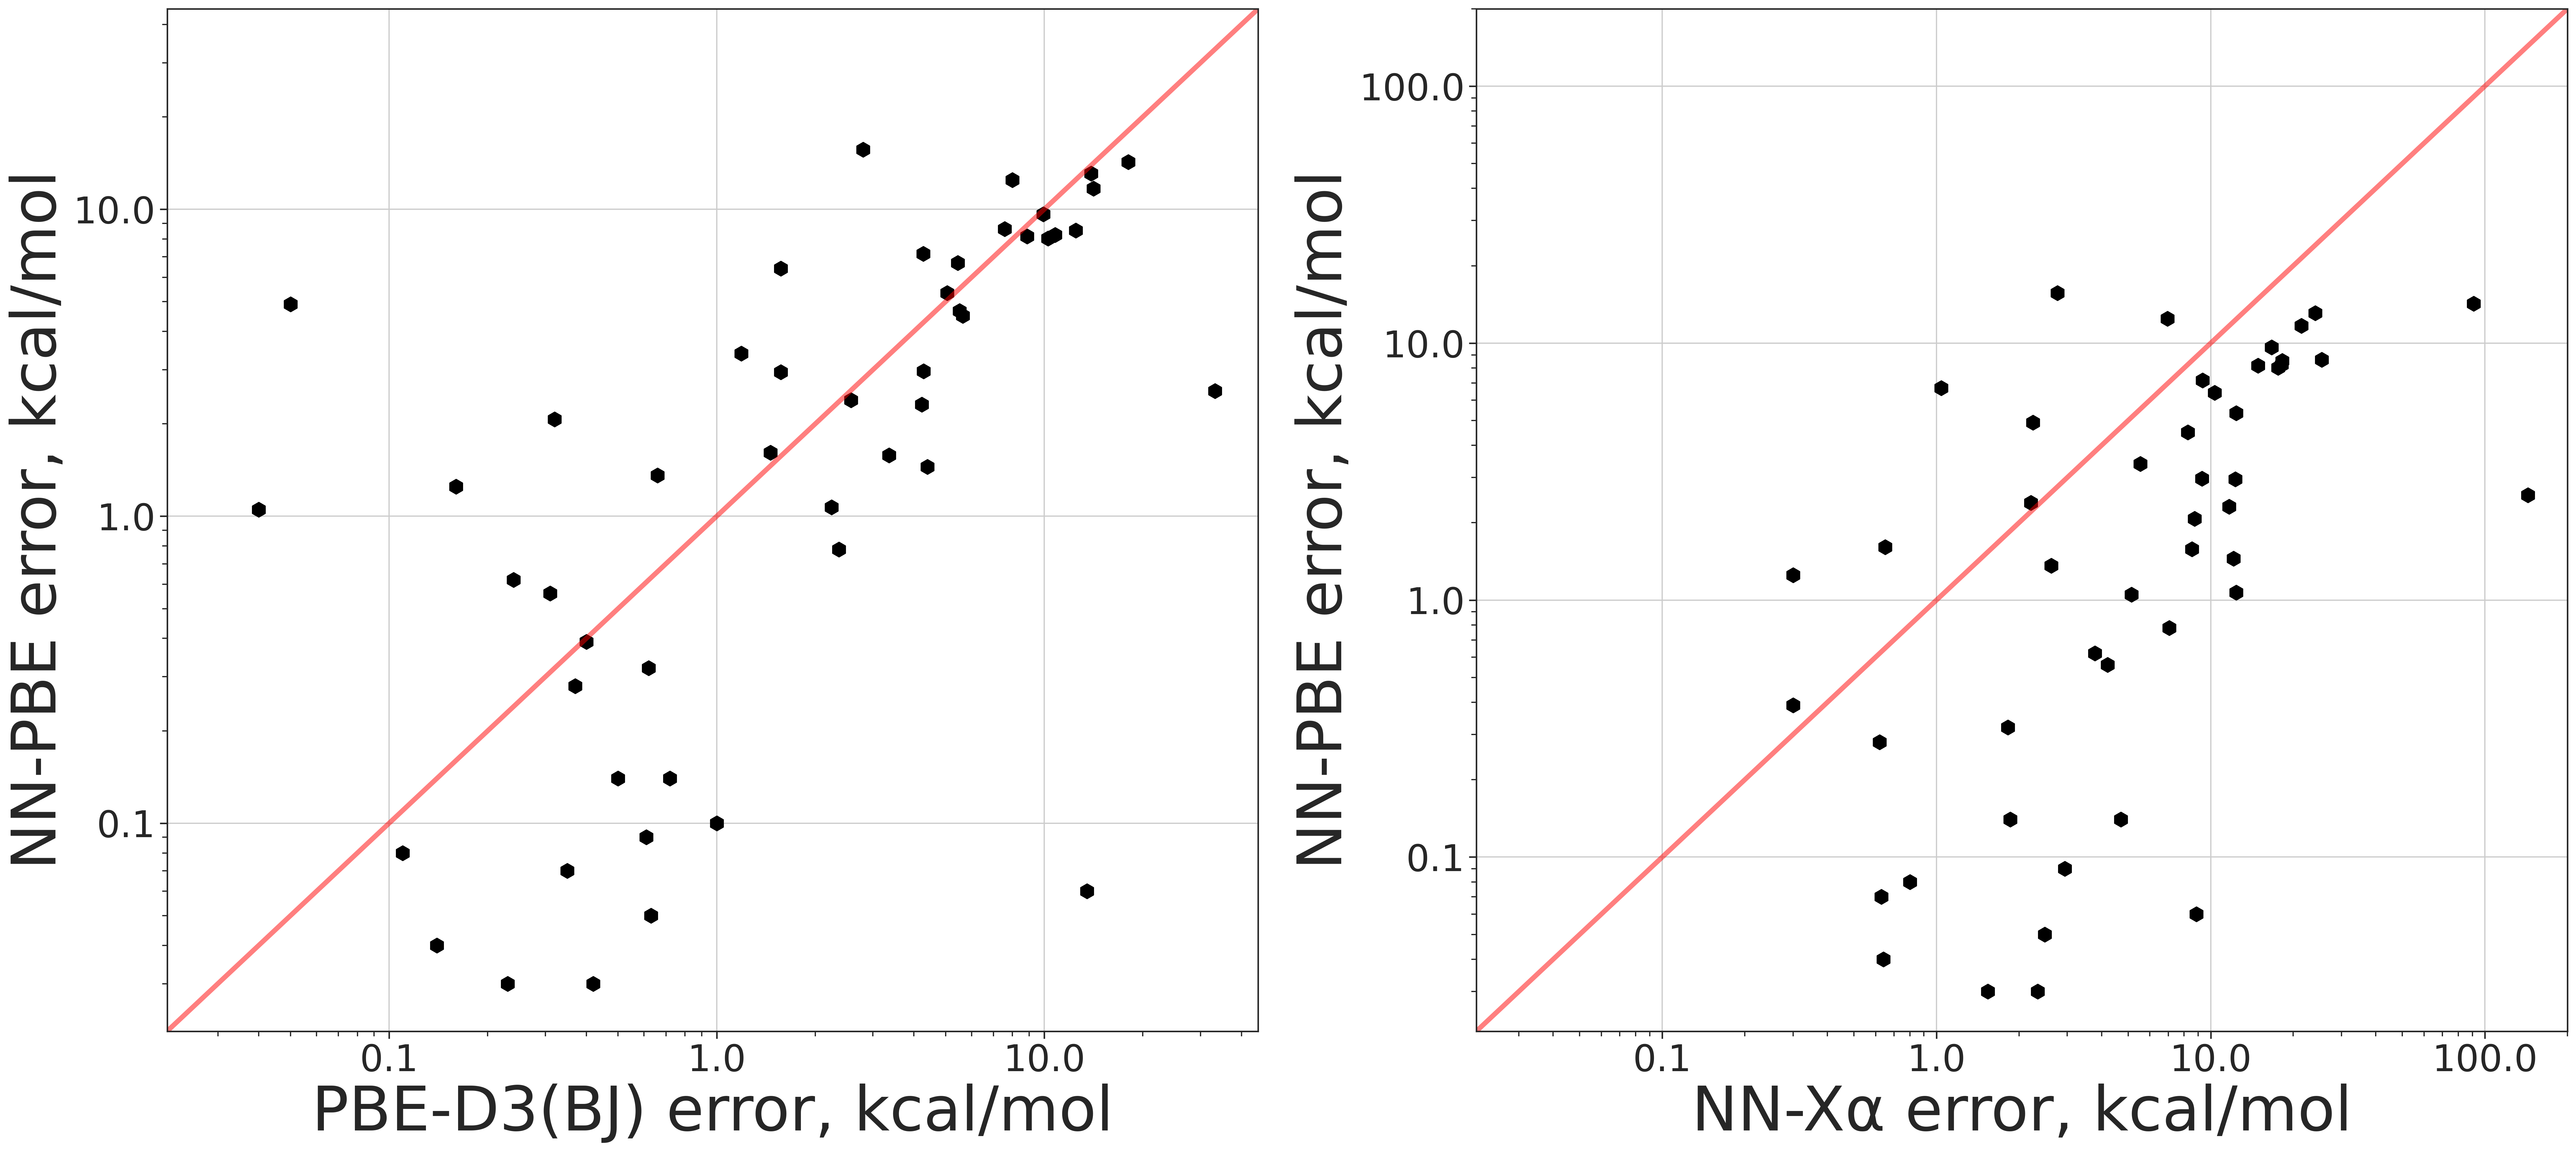

In [101]:
from matplotlib.ticker import ScalarFormatter

set_style(scale=2)
size = 50
fig, ax = plt.subplots(1,2, figsize=[35,15], dpi=300)
ax[0].scatter(x=df['PBE-D3BJ Error'], y=df['NN_PBE Error'], color='black', marker="h", s=140)
ax[1].scatter(x=df['NN_XAlpha Error'], y=df['NN_PBE Error'], color='black', marker="h", s=140)
ax[0].set_xlabel('PBE-D3(BJ) error, kcal/mol', size=size)
ax[1].set_xlabel('NN-Xα error, kcal/mol', size=size)
for axis in ax:
    axis.set_yscale('log')
    axis.set_xscale('log')
    axis.plot(np.linspace(0,200,2), np.linspace(0,200,2), color='red', lw=4, alpha=0.5)
    axis.set_ylabel('NN-PBE error, kcal/mol', size=size)
    axis.set_xticks([0.1, 1, 10, 100])
    axis.set_yticks([0.1, 1, 10, 100])
    axis.get_xaxis().set_major_formatter(ScalarFormatter())
    axis.get_yaxis().set_major_formatter(ScalarFormatter())
    axis.tick_params(axis='both', which='major', labelsize=30)
ax[0].set_ylim(bottom=0.021, top=45)
ax[0].set_xlim(left=0.021, right=45)
ax[1].set_ylim(bottom=0.021, top=200)
ax[1].set_xlim(left=0.021, right=200)
ax[0].grid()
ax[1].grid()

 

plt.show()